<a href="https://colab.research.google.com/github/SirivellaAnjani/World-Happiness-Visualization/blob/main/World_Happiness_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Understand Data

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the World Happiness Report dataset
df = pd.read_csv('world-happiness-report.csv')
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [ ]:
# Change name of US to USA
# df[df['Country']=='United States']['Country'] = 'United States of America'
usa_index= df[df['Country']=='United States'].index[0]
df.iloc[usa_index,0]='United States of America'

# Scatter Plot

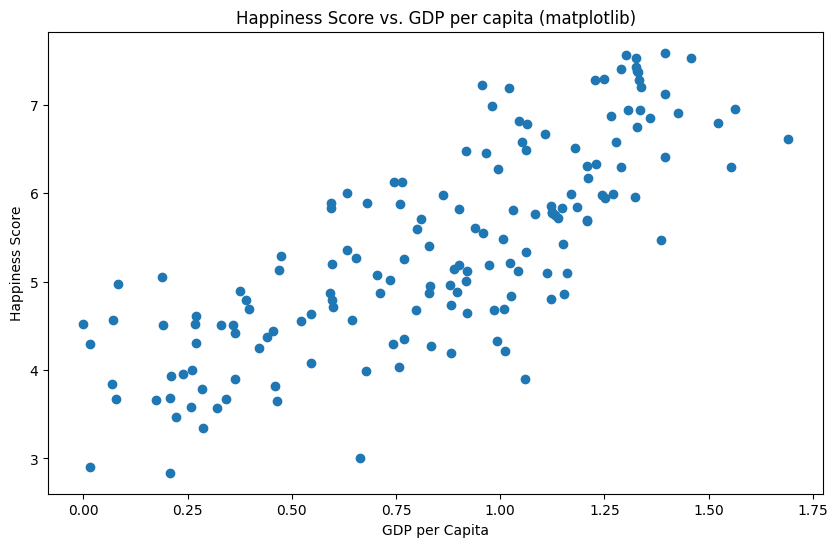

In [ ]:
# Create a Scatter Plot using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'])
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Happiness Score')
ax.set_title('Happiness Score vs. GDP per capita (matplotlib)')
plt.show()

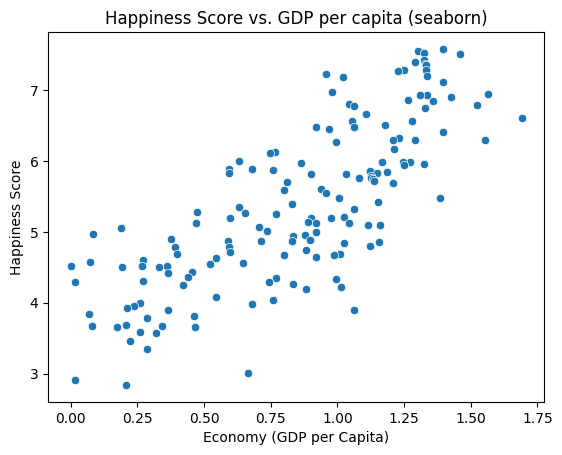

In [ ]:
# Create a Scatter Plot using seaborn
sns.scatterplot(data=df, x='Economy (GDP per Capita)', y='Happiness Score')
plt.title('Happiness Score vs. GDP per capita (seaborn)')
plt.show()

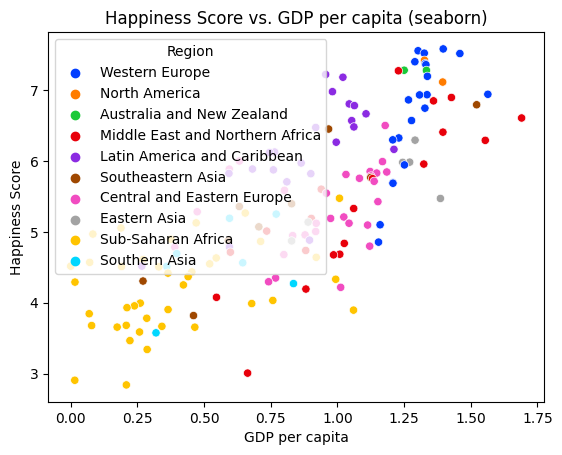

In [ ]:
# Create a Scatter Plot using seaborn - with colors
sns.scatterplot(data=df, x='Economy (GDP per Capita)', y='Happiness Score', hue='Region', palette='bright')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. GDP per capita (seaborn)')
plt.show()

In [ ]:
# Create a Scatter Plot using plotly
fig = px.scatter(df, x='Health (Life Expectancy)', y='Happiness Score', color='Region', hover_name='Country', size='Economy (GDP per Capita)')
fig.update_layout(title='Country-wise Happiness Score vs Life Expectancy (plotly)')
fig.show()

## Summary

The size of the circles denote the GDP per Capital and the colors correspond to the region each country belongs to. Some observations:
- Health and happiness have a strong positive correlation
- The higher the GDP, the more happy the country is
- Western Europe is happiest with high life expectancy
- Canada is the happiest North American country
- Sub saharan Africa is unhappiest with low life expectancy
- Singapore & Hong Kong have a life expectancy greater than the normalized score
- Yemen is an outlier: their life expectancy is the lowest in the Middle East and there is a large distance (largest?) from its neighboring country in the region (life expectancy is step up from 0.4 to 0.6)
- Syria is another oulier: even with a high life expectancy, it is the 2nd rank from the bottom in Happiness, beaten only by Togo
- Nigeria is the happiest country in its GDP-neighbors cluster
- Mauritius has the highest life expectancy (leaps ahead from its neighbors) and the highest happiness score in Sub-Saharan Africa
- Southeastern Asia is the most spread in terms of both Health and happiness
- In Southern Asia, Sri Lanka has the highest life expectancy but the lowest happiness score
- India and Pakistan have similar life expectancy but their happiness score has a large distance


Is Scatter Plot appropriate for this data?
- Data works well with scatter plot
- Best library is plotly.express (zoom, colors, interactive)
- A better visualization can be geospatial graphs


# Visualizing Geospatial Data with Folium 

In [ ]:
!pip install branca==0.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: branca
    Found existing installation: branca 0.6.0
    Uninstalling branca-0.6.0:
      Successfully uninstalled branca-0.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
folium 0.14.0 requires branca>=0.6.0, but you have branca 0.3.1 which is incompatible.


In [ ]:
import folium

# Import GeoJson
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

# Get country names
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)

In [ ]:
# Create folium map object
world_map = folium.Map(location=(30, 10), zoom_start=2, tiles="cartodb positron")
#world_map = folium.Map(location=(30, 10), zoom_start=2, tiles="Stamen Watercolor")
#folium.GeoJson(political_countries_url).add_to(world_map)


# Add title
loc = 'Happiness Score Across the World'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)  

world_map.get_root().html.add_child(folium.Element(title_html))

# Create Choropleth map
folium.Choropleth(  
    geo_data=country_shapes,
    data=df,
    columns=['Country', 'Happiness Score'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=.6,
    line_opacity=0.2,
    legend_name='Happiness Score',    
    smooth_factor=0,
    Highlight= True,
    line_color = "#0000",
    name = "Map",
    show=False,
    overlay=True,
    nan_fill_color = "Black"
).add_to(world_map)

world_map

## Summary
Geospatial charts are extremely useful for visualing data about locations; they highlight the physical connection between data points. The color denotes the amount of happiness in each country. Here are some impressions:
- We can see that Africa has a lower happiness score while Western Europe has a higher happiness score.
- Syria and Afghanisthan are the least happy countries in Middle East/North African Region
- UAE and Oman are the happiest Middle Eastern countries
- North America and Australia are the happiest continents.

All in all, it seems that we are only as happy as our neighbors.





# Waffle Chart

In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Waffle packages
from pywaffle import Waffle
import matplotlib.pyplot as plt

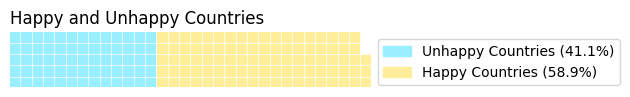

In [ ]:
# Divide data into happy and unhappy countries
dfUnhappy = df[df['Happiness Score']<5]
dfHappy = df[df['Happiness Score']>=5]

# Find total number of unhappy countries
dfur = dfUnhappy.groupby(['Region']).count()
dfur = dfur.sort_values(by=['Country'], ascending=False)
usum = dfur['Country'].sum()

# Find total number of happy countries
dfhr = dfHappy.groupby(['Region']).count()
dfhr = dfhr.sort_values(by=['Country'], ascending=False)
hsum = dfhr['Country'].sum()

# Calculate Percentages
uper = (usum*100)/(usum+hsum)
uper = round(uper, 1)
hper = (hsum*100)/(usum+hsum)
hper = round(hper, 1)

# Plot Waffle Chart
plt.figure(
    title={"label": "Happy and Unhappy Countries", "loc": "left"},
    FigureClass = Waffle,
    rows = 5,
    #icons = 'face-smile',
    values = [usum,hsum],
    font_size=12,
    icon_legend=True,
    labels=list(['Unhappy Countries ('+str(uper) +"%)", 'Happy Countries ('+ str(hper) +"%)"]),
    colors = ["#99EEFF", "#FFEE99"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})
plt.show()

## Summary
Waffle charts are meant to show the contributions of individual categories. We have divided the world into 2 categories - happy and unhappy countries. Happy countries are defined by a Happiness Score of 5 and above. Each square represents a country. We can see that the world is compromised of more happy countries than unhappy countries.

# Experiments

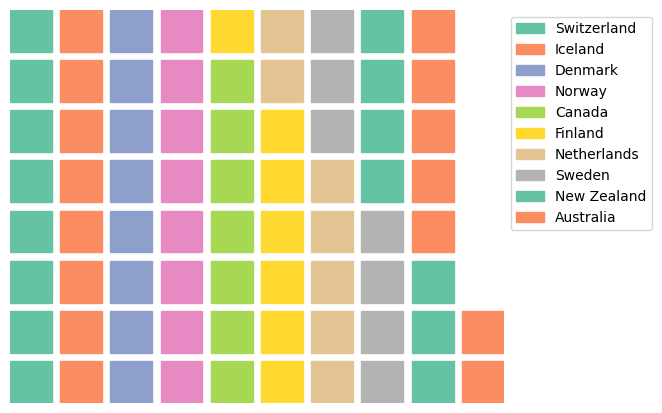

In [ ]:
# Select the top 10 Ranked countries
df_top = df[df['Happiness Rank']<11]

plt.figure(
    FigureClass = Waffle,
    rows = 8,
    values = df_top['Happiness Score'],
    labels=list(df_top.Country),  # Legend would not be created without this line
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})
plt.show()

## Experiment 1

Visualize the average happiness score (denoted by color) for each region.

In [ ]:
# Group by Region and Calculate the mean of the happiness score
dfg = df.groupby(['Region']).mean()
dfg

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066974,0.920490,0.705615,0.361751,0.181702,0.190376,1.980008
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


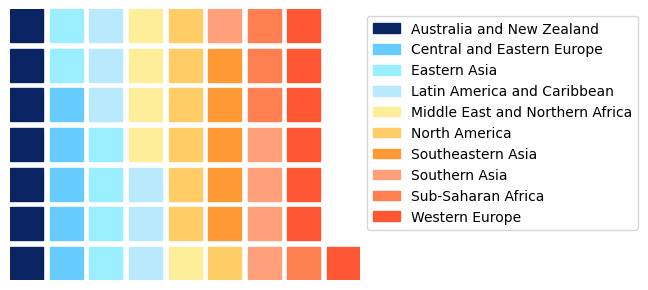

In [ ]:
# Visualize the data
plt.figure(
    FigureClass = Waffle,
    rows = 7,
    values = dfg['Happiness Score'],
    colors = ["#0A2463", "#66CCFF", "#99EEFF", "#B9E9FC", "#FFEE99", "#FFCC66", "#FF9933", "#ffa07a", "#ff7f50", "#ff5733"],
    labels=list(dfg.index),  # Legend would not be created without this line
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})
plt.show()

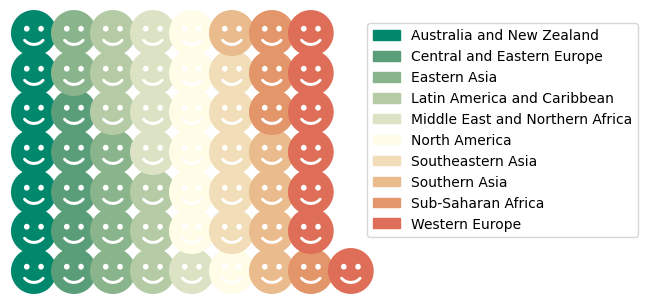

In [ ]:
# Visuale 
plt.figure(
    FigureClass = Waffle,
    rows = 7,
    values = dfg['Happiness Score'],
    colors = ['#00876c','#599e79','#8ab48c','#b5cba5','#dce3c4','#fffce7','#f1ddb7','#eabb8c','#e4966b','#de6e57'],
    labels=list(dfg.index),  # Legend would not be created without this line
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons = 'face-smile')
plt.show()

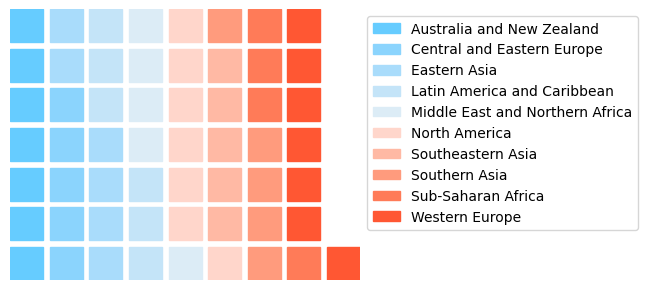

In [ ]:
plt.figure(
    FigureClass = Waffle,
    rows = 7,
    values = dfg['Happiness Score'],
    colors = ['#66ccff','#8bd4fd','#a9dcfb','#c4e4f8','#dcecf6','#ffd6cb','#ffb9a4','#ff9b7d','#ff7b58','#ff5733'],
    labels=list(dfg.index),  # Legend would not be created without this line
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})
plt.show()

## Experiment 2

In [ ]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
off_color = 'lightgrey'

dfUnhappy = df[df['Happiness Score']<5]
dfHappy = df[df['Happiness Score']>=5]

dfur = dfUnhappy.groupby(['Region']).count()
dfur = dfur.sort_values(by=['Country'], ascending=False)
usum = dfur['Country'].sum()
print(usum)

dfhr = dfHappy.groupby(['Region']).count()
dfhr = dfhr.sort_values(by=['Country'], ascending=False)
hsum = dfhr['Country'].sum()
print(hsum)
dfur

65
93


,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Sub-Saharan Africa,36,36,36,36,36,36,36,36,36,36,36
Central and Eastern Europe,8,8,8,8,8,8,8,8,8,8,8
Middle East and Northern Africa,8,8,8,8,8,8,8,8,8,8,8
Southern Asia,5,5,5,5,5,5,5,5,5,5,5
Latin America and Caribbean,3,3,3,3,3,3,3,3,3,3,3
Southeastern Asia,3,3,3,3,3,3,3,3,3,3,3
Eastern Asia,1,1,1,1,1,1,1,1,1,1,1
Western Europe,1,1,1,1,1,1,1,1,1,1,1


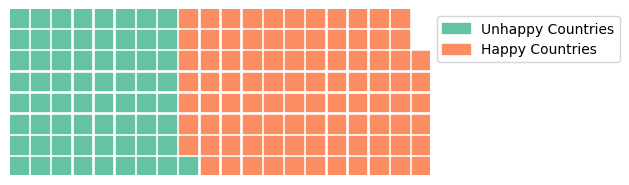

In [ ]:
plt.figure(
    FigureClass = Waffle,
    rows = 8,
    values = [usum,hsum],
    labels=list(['Unhappy Countries', 'Happy Countries']),  # Legend would not be created without this line
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})
plt.show()

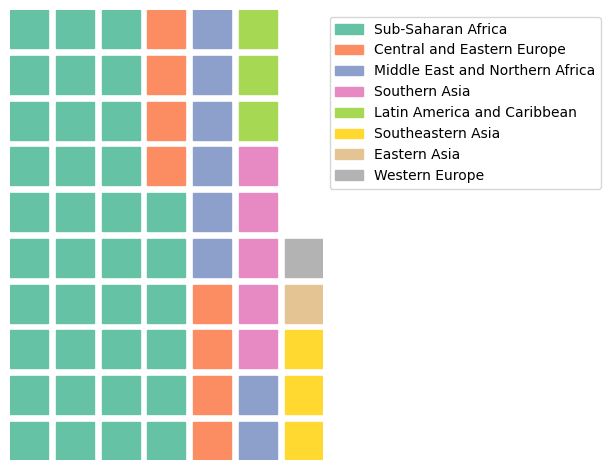

In [ ]:
plt.figure(
    FigureClass = Waffle,
    rows = 10,
    values = dfur['Country'],
    labels=list(dfur.index),  # Legend would not be created without this line
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})
plt.show()

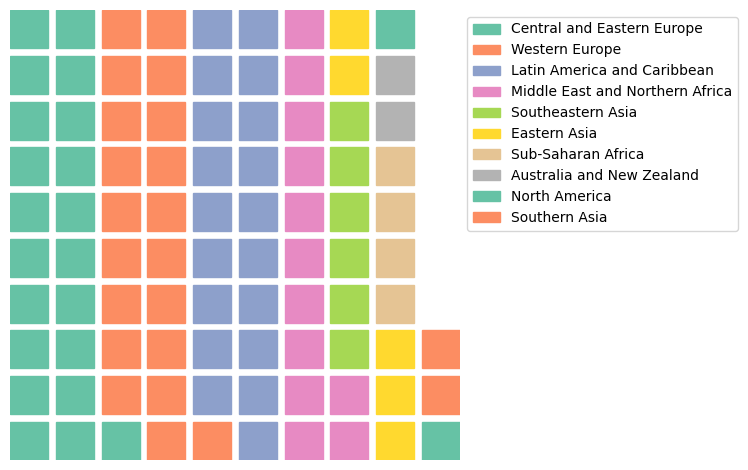

In [ ]:
plt.figure(
    FigureClass = Waffle,
    rows = 10,
    values = dfhr['Country'],
    labels=list(dfhr.index),  # Legend would not be created without this line
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})
plt.show()

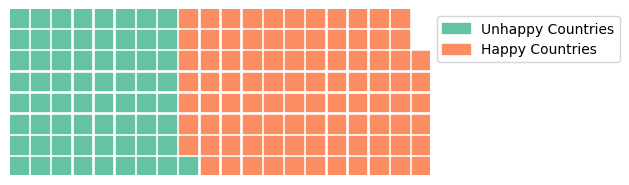

In [ ]:
plt.figure(
    FigureClass = Waffle,
    rows = 8,
    values = [usum,hsum],
    labels=list(['Unhappy Countries', 'Happy Countries']),  # Legend would not be created without this line
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})
plt.show()